In [1]:
##Importing the dependencies
import dlib
import cv2
import numpy as np
import cvlib
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## HOG based face detection

In [7]:
##Initialization of 128-dimensional face-descriptor, facial landmark and face detector
pose_predictor_5_shape = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
face_encoder = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")
detector = dlib.get_frontal_face_detector()


def face_encode(face_image,num_upsamples=1,num_jitters=1):
    
    #detecting faces in an image
    face_locations = detector(face_image,num_upsamples)
    
    #getting facial landmarks
    raw_landmarks = [pose_predictor_5_shape(face_image,face_location) for face_location in face_locations]
    
    ##encoding the face
    return [np.array(face_encoder.compute_face_descriptor(face_image,raw_landmark,num_jitters)) for raw_landmark in raw_landmarks]
                     
    
    
def compare_faces_matching(known_encodings,unknown_encodings):
    
    ##returns the distance when comparing the list of face_encodings
    return np.linalg.norm(known_encodings-unknown_encodings)


def compare_faces(known_encodings,unknown_encodings):
    
    ##returns the distance when comparing the list of face_encodings
    return list(np.linalg.norm(known_encodings-unknown_encodings,axis=1))

def compare_faces_ordered(known_encodings,face_names,unknown_encodings):
    
    distance = list(np.linalg.norm(known_encodings-unknown_encodings,axis=1))
    return zip(*sorted(zip(distance,names)))
    

In [8]:
##main program

##loading an image
known_image_1 = cv2.imread('Brad_pitt/download (1).jpg')
known_image_2 = cv2.imread('Brad_pitt/download (2).jpg')
known_image_3 = cv2.imread('Brad_pitt/images (3).jpg')
known_image_4 = cv2.imread('Tom_cruise/download (1).jpg')
known_image_5 = cv2.imread('Tom_cruise/download (2).jpg')
unknown_image = cv2.imread('Brad_pitt/images (8).jpg')


##converting to rgb
known_image_1 = known_image_1[:,:,::-1]
known_image_2 = known_image_2[:,:,::-1]
known_image_3 = known_image_3[:,:,::-1]
known_image_4 = known_image_4[:,:,::-1]
known_image_5 = known_image_5[:,:,::-1]
unknown_image = unknown_image[:,:,::-1]


##list of images
images = [known_image_1,known_image_2,known_image_3,known_image_4,known_image_5]

##getting encodings of the image
known_image_1_encoding = face_encode(known_image_1)[0]
known_image_2_encoding = face_encode(known_image_2)[0]
known_image_3_encoding = face_encode(known_image_3)[0]
known_image_4_encoding = face_encode(known_image_4)[0]
known_image_5_encoding = face_encode(known_image_5)[0]
unknown_encodings = face_encode(unknown_image)[0]


##list of known faces encodings
encodings = [known_image_1_encoding,known_image_2_encoding,known_image_3_encoding,known_image_4_encoding,known_image_5_encoding]


##create names of the encodings
names = ['Brad pitt','Brad pitt','Brad pitt','Tom cruise','Tom cruise']



##compare faces
computed_faces = compare_faces(encodings,unknown_encodings)
computed_faces_ordered,ordered_names = compare_faces_ordered(encodings,names,unknown_encodings)

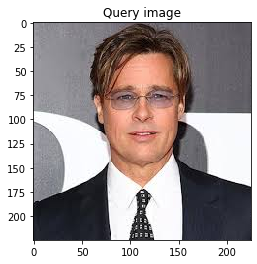

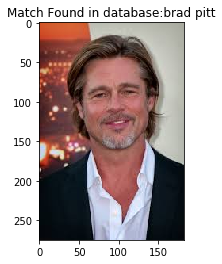

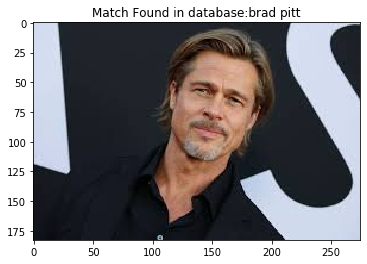

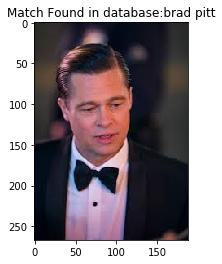

In [10]:
plt.title('Query image')
plt.imshow(unknown_image)
plt.ion()
for i,name in enumerate(names):
    result = compare_faces_matching(encodings[i],unknown_encodings)
    if result < 0.6:
        plt.figure()
        plt.title(f'Match Found in database:{name}')
        plt.imshow(images[i])
        plt.show()

## CNN(cvlib) based face detection

In [12]:
##functions
pose_predictor_68_shape = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
face_encoder = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

def face_encode(face_image,num_upsamples=1,num_jitters=1):
    faces = []
    r = []
    #detecting faces in an image
    face_locations,confidence = cvlib.detect_face(face_image,0.5)
    for rect in face_locations:
        for i in rect:
            r.append(i)
        faces.append(dlib.rectangle(r[0],r[1],r[2],r[3]))
    
    
    #getting facial landmarks
    raw_landmarks = [pose_predictor_68_shape(face_image,face_location) for face_location in faces]
    
    
        
    ##encoding the face
    return [np.array(face_encoder.compute_face_descriptor(face_image,raw_landmark,num_jitters)) for raw_landmark in raw_landmarks]





def compare_faces_matching(known_encodings,unknown_encodings):
    
    ##returns the distance when comparing the list of face_encodings
    return np.linalg.norm(known_encodings-unknown_encodings)





def compare_faces(known_encodings,unknown_encodings):
    
    ##returns the distance when comparing the list of face_encodings
    return list(np.linalg.norm(known_encodings-unknown_encodings,axis=1))

In [17]:
##main program

##loading an image
known_image_1 = cv2.imread('Brad_pitt/images (1).jpg')
known_image_2 = cv2.imread('Brad_pitt/images (6).jpg')
known_image_3 = cv2.imread('Brad_pitt/images (25).jpg')
known_image_4 = cv2.imread('Tom_cruise/download (4).jpg')
known_image_5 = cv2.imread('Tom_cruise/images (2).jpg')
unknown_image = cv2.imread('Tom_cruise/images (9).jpg')



##converting to rgb
known_image_1 = known_image_1[:,:,::-1]
known_image_2 = known_image_2[:,:,::-1]
known_image_3 = known_image_3[:,:,::-1]
known_image_4 = known_image_4[:,:,::-1]
known_image_5 = known_image_5[:,:,::-1]
unknown_image = unknown_image[:,:,::-1]


##list of images
images = [known_image_1,known_image_2,known_image_3,known_image_4,known_image_5]

##getting encodings of the image
known_image_1_encoding = face_encode(known_image_1)[0]
known_image_2_encoding = face_encode(known_image_2)[0]
known_image_3_encoding = face_encode(known_image_3)[0]
known_image_4_encoding = face_encode(known_image_4)[0]
known_image_5_encoding = face_encode(known_image_5)[0]
unknown_encodings = face_encode(unknown_image)[0]


##list of known faces encodings
encodings = [known_image_1_encoding,known_image_2_encoding,known_image_3_encoding,known_image_4_encoding,known_image_5_encoding]


##create names of the encodings
names = ['Brad pitt','Brad pitt','Brad pitt','Tom cruise','Tom cruise']



##compare faces
computed_faces = compare_faces(encodings,unknown_encodings)
computed_faces_ordered = compare_faces_ordered(encodings,names,unknown_encodings)

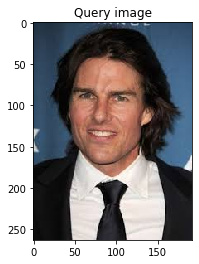

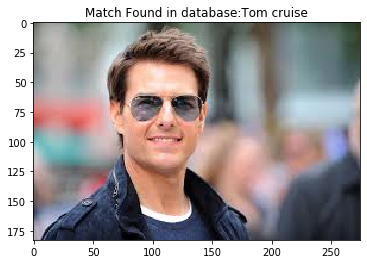

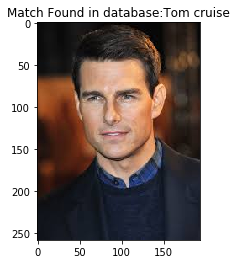

In [19]:
plt.title('Query image')
plt.imshow(unknown_image)
plt.ion()
for i,name in enumerate(names):
    result = compare_faces_matching(encodings[i],unknown_encodings)
    if result < 0.6:
        plt.figure()
        plt.title(f'Match Found in database:{name}')
        plt.imshow(images[i])
    plt.show()